#Question 4: Granulometry

##1- Loading the Images

In [ ]:
from google.colab import drive
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

label_1_path = '/content/drive/My Drive/Assignment-2/labeled-1.jpg'
label_2_path = '/content/drive/My Drive/Assignment-2/labeled-2.jpg'
label_3_path = '/content/drive/My Drive/Assignment-2/labeled-3.jpg'

labeled_1 = cv2.imread(label_1_path, cv2.IMREAD_GRAYSCALE)
labeled_2 = cv2.imread(label_2_path, cv2.IMREAD_GRAYSCALE)
labeled_3 = cv2.imread(label_3_path, cv2.IMREAD_GRAYSCALE)

Mounted at /content/drive


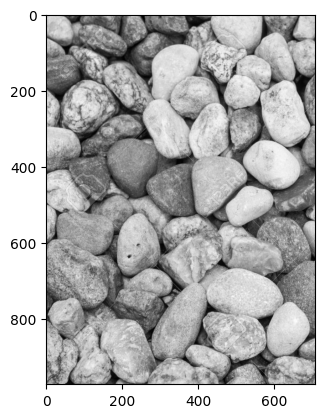

In [ ]:
plt.imshow(labeled_1, cmap="gray")

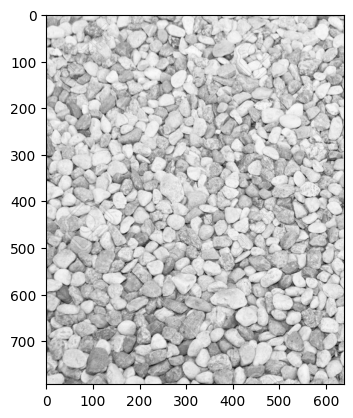

In [ ]:
plt.imshow(labeled_2, cmap="gray")

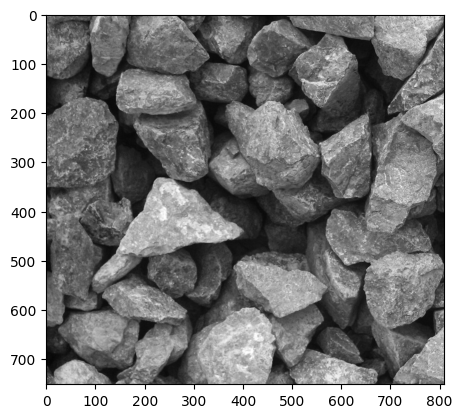

In [ ]:
plt.imshow(labeled_3, cmap="gray")

In [ ]:
unlabeled_A_path = '/content/drive/My Drive/Assignment-2/unlabeled-A.jpg'
unlabeled_B_path = '/content/drive/My Drive/Assignment-2/unlabeled-B.jpg'
unlabeled_C_path = '/content/drive/My Drive/Assignment-2/unlabeled-C.jpg'

unlabeled_A = cv2.imread(unlabeled_A_path, cv2.IMREAD_GRAYSCALE)
unlabeled_B = cv2.imread(unlabeled_B_path, cv2.IMREAD_GRAYSCALE)
unlabeled_C = cv2.imread(unlabeled_C_path, cv2.IMREAD_GRAYSCALE)

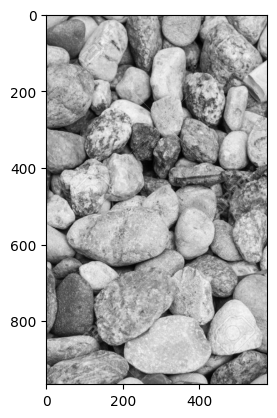

In [ ]:
plt.imshow(unlabeled_A, cmap="gray")

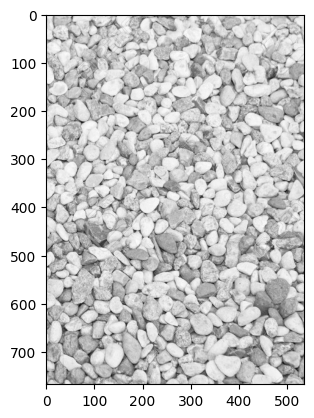

In [ ]:
plt.imshow(unlabeled_B, cmap="gray")

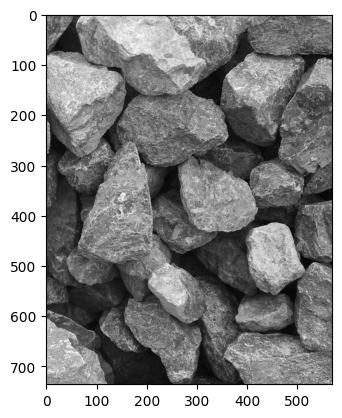

In [ ]:
plt.imshow(unlabeled_C, cmap="gray")

##2- Implementation of Opening

Opening was selected as the algorithm that will be used for granulometry. Opening utilizes two main mophological functions:
* Erosion
* Dilation

Implementation of these function are given in the below cells.

Note that, in this example, kernel consists of a mask to have a circular SE. Reason behind the circular SE is given in the PDF.

In [ ]:
def grayscale_erosion(img, SE):

  se_height, se_width = SE.shape
  img_height, img_width = img.shape

  row_pass = img_height - se_height + 1
  column_pass = img_width - se_width + 1

  # Padding
  lost_pixel_height = (se_height - 1)//2
  lost_pixel_width = (se_width - 1)//2
  eroded_img_np = [[0 for j in range(img_width)] for i in range(lost_pixel_height)]

  for i in range(row_pass):

    eroded_row = [0 for k in range(lost_pixel_width)]

    for j in range(column_pass):

      # Current window from the image
      patch = img[i: i + se_height, j:j + se_width]
      # Select the minimum value from the window, within the mask
      eroded_row.append(patch[SE == 1].min())

    pad_from_left = [0 for k in range(lost_pixel_width)]
    eroded_row.extend(pad_from_left)
    eroded_img_np.append(eroded_row)

  # Padding
  pad_from_bottom = [[0 for j in range(img_width)] for i in range(lost_pixel_height)]
  eroded_img_np.extend(pad_from_bottom)

  # Returning the eroded and padded image in numpy form
  return np.array(eroded_img_np)

Example for erosion:

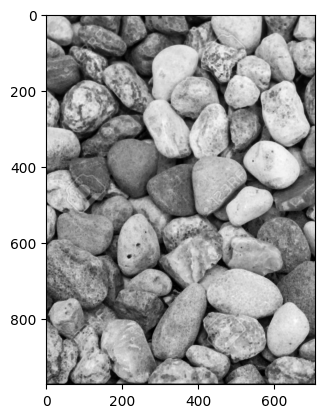

In [ ]:
plt.imshow(grayscale_erosion(labeled_1, np.array([[1,1,1],
                                                  [1,1,1],
                                                  [1,1,1]])), cmap="gray")

In [ ]:
def grayscale_dilation(img, SE, pad=255):

  se_height, se_width = SE.shape
  img_height, img_width = img.shape

  row_pass = img_height - se_height + 1
  column_pass = img_width - se_width + 1

  # Padding
  lost_pixel_height = (se_height - 1)//2
  lost_pixel_width = (se_width - 1)//2
  dilated_img_np = [[pad for j in range(img_width)] for i in range(lost_pixel_height)]

  for i in range(row_pass):

    dilated_row = [pad for k in range(lost_pixel_width)]

    for j in range(column_pass):

      # Current window from the image
      patch = img[i: i + se_height, j:j + se_width]
      # Select the maximum value from the window, within the mask
      dilated_row.append(patch[SE == 1].max())

    pad_from_left = [pad for k in range(lost_pixel_width)]
    dilated_row.extend(pad_from_left)
    dilated_img_np.append(dilated_row)

  # Padding
  pad_from_bottom = [[pad for j in range(img_width)] for i in range(lost_pixel_height)]
  dilated_img_np.extend(pad_from_bottom)

  # Returning the eroded and padded image in numpy form
  return np.array(dilated_img_np)

Example for dilation:

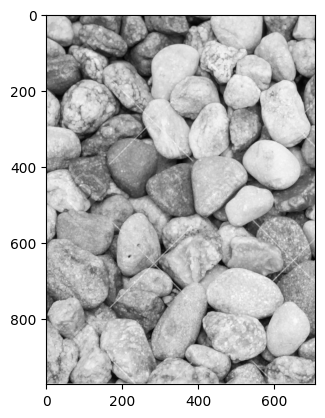

In [ ]:
plt.imshow(grayscale_dilation(labeled_1, np.array([[1,1,1],
                                                  [1,1,1],
                                                  [1,1,1]])), cmap="gray")

Opening operation is:
* Eroding the image with the SE
* Dilating the eroded image with reflected SE

The function below implements this operation.

In [ ]:
def grayscale_opening(img, SE, pad=255):

  eroded = grayscale_erosion(img, SE)
  ref_SE = arr_reflected_both = np.flipud(np.fliplr(SE))
  dilated = grayscale_dilation(img, ref_SE, pad)

  return dilated

Example for opening:

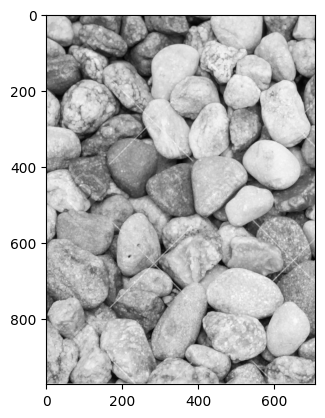

In [ ]:
plt.imshow(grayscale_opening(labeled_1, np.array([[1,1,1],
                                                  [1,1,1],
                                                  [1,1,1]])), cmap="gray")

##3- Implementing the Tophat

Tophat function is used for images where the illumination is not homogenous. Tophat was implemented to see whether it would help with the same issue in this problem. Evaluation of results are present in the PDF.

In [ ]:
def tophat(img, SE):

  opening = grayscale_opening(img, SE, pad=0)
  diff = img - opening

  return diff

Labeled-1 with tophat:

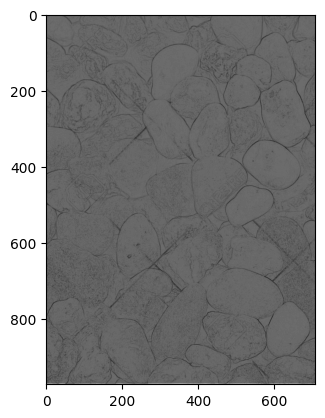

In [ ]:
plt.imshow(tophat(labeled_1, np.array([[1,1,1],
                                                  [1,1,1],
                                                  [1,1,1]])), cmap="gray")

Labeled-2 with tophat:

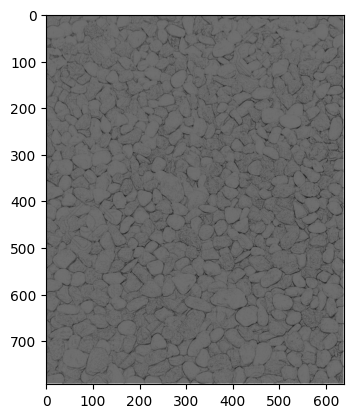

In [ ]:
plt.imshow(tophat(labeled_2, np.array([[1,1,1],
                                                  [1,1,1],
                                                  [1,1,1]])), cmap="gray")

Labeled-3 with tophat:

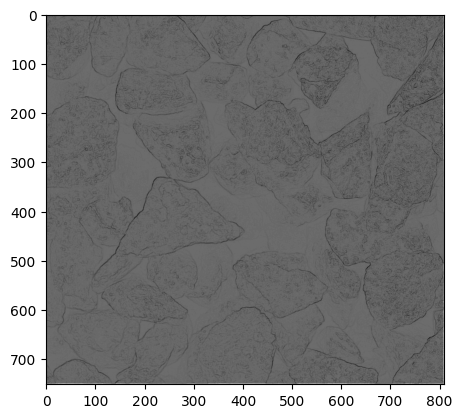

In [ ]:
plt.imshow(tophat(labeled_3, np.array([[1,1,1],
                                                  [1,1,1],
                                                  [1,1,1]])), cmap="gray")

##4- Granulometry

Implementation of circular SE:

In [ ]:
def circular_mask_SE(size):
    r = size // 2
    y, x = np.ogrid[-r:r+1, -r:r+1]
    kernel = x**2 + y**2 <= r**2
    return kernel.astype(np.uint8)

Granulometry means applying opening operation on the image repeatedly, but size of the SE is changing at each step. Checking the result of opening at each step gives us an idea about how much is removed by the opening.

In [ ]:
def granulometry(img, sieves):

  series = []

  for sieve in sieves:

    SE = circular_mask_SE(sieve)
    opening = grayscale_opening(img, SE)
    series.append(np.mean(opening))

  return np.array(series)

Sieve/SE sizes are decided by eyeballing the minimum and maximum size of the gravels.

In the part below, granulometry series for each of the labeled and unlabeled sample is calculated.

Labeled-1:

In [ ]:
sieves = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]

series_1 = granulometry(labeled_1, sieves)
print(series_1)

[214.81334717 231.14368853 237.99541687 242.47590442 245.22604247
 247.30849812 248.66732929 249.79140511 250.59070935 251.29839024]


Labeled-2:

In [ ]:
series_2 = granulometry(labeled_2, sieves)
print(series_2)

[243.33450754 250.26808913 252.63040848 253.81477798 254.36455133
 254.70732367 254.87873549 254.96504627 254.99360405 254.99992698]


Labeled-3:

In [ ]:
series_3 = granulometry(labeled_3, sieves)
print(series_3)

[177.16836849 207.86678293 223.37425374 233.88754833 240.23437623
 244.78962569 247.61846941 249.67048234 251.07444343 252.2467832 ]


Unlabeled-A:

In [ ]:
series_A = granulometry(unlabeled_A, sieves)
print(series_A)

[220.01853631 235.27382075 241.78935941 245.83799416 248.0998243
 249.73781308 250.79647346 251.6850476  252.31475519 252.83058429]


Unlabeled-B:

In [ ]:
series_B = granulometry(unlabeled_B, sieves)
print(series_B)

[244.55818806 251.36926452 253.37735152 254.34284632 254.74366935
 254.90911653 254.96526158 254.98891286 254.99738855 255.        ]


Unlabeled-C:

In [ ]:
series_C = granulometry(unlabeled_C, sieves)
print(series_C)

[193.62111461 223.17615132 236.71173722 244.73981693 249.04983791
 252.11076707 253.73872998 254.56882151 254.83937595 254.94165475]


##5- Comapring Labeled and Unlabeled

This section compares the series of labeled and unlabeled gravels according to different distance functions. The decided label is given according to the minimuj distance between series.

For Unlabeled-A:

In [ ]:
euclidean_dist = []
euclidean_dist.append(np.linalg.norm(series_A - series_1, ord=2))
euclidean_dist.append(np.linalg.norm(series_A - series_2, ord=2))
euclidean_dist.append(np.linalg.norm(series_A - series_3, ord=2))

idx = euclidean_dist.index(min(euclidean_dist))

if idx == 0:
  print("A is class 1 by Euclidean distance")
elif idx == 1:
  print("A is class 2 by Euclidean distance")
else:
  print("A is class 3 by Euclidean distance")

manhattan_dist = []
manhattan_dist.append(np.linalg.norm(series_A - series_1, ord=1))
manhattan_dist.append(np.linalg.norm(series_A - series_2, ord=1))
manhattan_dist.append(np.linalg.norm(series_A - series_3, ord=1))

idx = manhattan_dist.index(min(manhattan_dist))

if idx == 0:
  print("A is class 1 by Manhattan distance")
elif idx == 1:
  print("A is class 2 by Manhattan distance")
else:
  print("A is class 3 by Manhattan distance")

chebyshev_dist = []
chebyshev_dist.append(np.linalg.norm(series_A - series_1, ord=np.inf))
chebyshev_dist.append(np.linalg.norm(series_A - series_2, ord=np.inf))
chebyshev_dist.append(np.linalg.norm(series_A - series_3, ord=np.inf))

idx = chebyshev_dist.index(min(chebyshev_dist))

if idx == 0:
  print("A is class 1 by Chebyshev distance")
elif idx == 1:
  print("A is class 2 by Chebyshev distance")
else:
  print("A is class 3 by Chebyshev distance")

A is class 1 by Euclidean distance
A is class 1 by Manhattan distance
A is class 1 by Chebyshev distance


For Unlabeled-B:

In [ ]:
euclidean_dist = []
euclidean_dist.append(np.linalg.norm(series_B - series_1, ord=2))
euclidean_dist.append(np.linalg.norm(series_B - series_2, ord=2))
euclidean_dist.append(np.linalg.norm(series_B - series_3, ord=2))

idx = euclidean_dist.index(min(euclidean_dist))

if idx == 0:
  print("B is class 1 by Euclidean distance")
elif idx == 1:
  print("B is class 2 by Euclidean distance")
else:
  print("B is class 3 by Euclidean distance")

manhattan_dist = []
manhattan_dist.append(np.linalg.norm(series_B - series_1, ord=1))
manhattan_dist.append(np.linalg.norm(series_B - series_2, ord=1))
manhattan_dist.append(np.linalg.norm(series_B - series_3, ord=1))

idx = manhattan_dist.index(min(manhattan_dist))

if idx == 0:
  print("B is class 1 by Manhattan distance")
elif idx == 1:
  print("B is class 2 by Manhattan distance")
else:
  print("B is class 3 by Manhattan distance")

chebyshev_dist = []
chebyshev_dist.append(np.linalg.norm(series_B - series_1, ord=np.inf))
chebyshev_dist.append(np.linalg.norm(series_B - series_2, ord=np.inf))
chebyshev_dist.append(np.linalg.norm(series_B - series_3, ord=np.inf))

idx = chebyshev_dist.index(min(chebyshev_dist))

if idx == 0:
  print("B is class 1 by Chebyshev distance")
elif idx == 1:
  print("B is class 2 by Chebyshev distance")
else:
  print("B is class 3 by Chebyshev distance")

B is class 2 by Euclidean distance
B is class 2 by Manhattan distance
B is class 2 by Chebyshev distance


For Unlabeled-C:

In [ ]:
euclidean_dist = []
euclidean_dist.append(np.linalg.norm(series_C - series_1, ord=2))
euclidean_dist.append(np.linalg.norm(series_C - series_2, ord=2))
euclidean_dist.append(np.linalg.norm(series_C - series_3, ord=2))

idx = euclidean_dist.index(min(euclidean_dist))

if idx == 0:
  print("C is class 1 by Euclidean distance")
elif idx == 1:
  print("C is class 2 by Euclidean distance")
else:
  print("C is class 3 by Euclidean distance")

manhattan_dist = []
manhattan_dist.append(np.linalg.norm(series_C - series_1, ord=1))
manhattan_dist.append(np.linalg.norm(series_C - series_2, ord=1))
manhattan_dist.append(np.linalg.norm(series_C - series_3, ord=1))

idx = manhattan_dist.index(min(manhattan_dist))

if idx == 0:
  print("C is class 1 by Manhattan distance")
elif idx == 1:
  print("C is class 2 by Manhattan distance")
else:
  print("C is class 3 by Manhattan distance")

chebyshev_dist = []
chebyshev_dist.append(np.linalg.norm(series_C - series_1, ord=np.inf))
chebyshev_dist.append(np.linalg.norm(series_C - series_2, ord=np.inf))
chebyshev_dist.append(np.linalg.norm(series_C - series_3, ord=np.inf))

idx = chebyshev_dist.index(min(chebyshev_dist))

if idx == 0:
  print("C is class 1 by Chebyshev distance")
elif idx == 1:
  print("C is class 2 by Chebyshev distance")
else:
  print("C is class 3 by Chebyshev distance")

C is class 1 by Euclidean distance
C is class 1 by Manhattan distance
C is class 3 by Chebyshev distance
